- Title: Key Python Libraries for Working with Data
- Date: 2018-12-22
- Tags: python, programming, statistics, week5

In this lesson I'm just going to describe the main libraries that we'll see when we work with data in Python.  

## Numpy

Numpy is the first library we work with.  By convention, it's imported with `import numpy as np`.  Numpy really provides two things to our workflow: 

1.  Math that goes faster than unadorned Python could do it---which is important when you're doing statistics, because under the hood computational stats can take a lot of calculations.

2.  Convenient data structures as well as functions that operate on them. 

Let's talk about number 2 for a minute.  Numpy provides special numeric types which you don't need to worry about, but also the array, which is like a Python list, but with special properties that make it more useful for mathematical operations.  The other main Python data libraries tend to assume that you're working with arrays, or something that can be converted with arrays---but lists can be pretty seamlessly converted to arrays, so that's ok. 

The other great part of number 2 is that numpy lets you do math on entire arrays as well as individual numbers.  For example: 

In [1]:
import numpy as np
mynums = np.array([1, 2, 3, 4, 5])
print(mynums * 2)

[ 2  4  6  8 10]


See what I did there?  I just multipled the entire array by 2 in one go.  You couldn't do that with ordinary Python lists.

In [2]:
print([1, 2, 3, 4, 5] * 2)

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]


Numpy also provides a lot of convenience functions, for example, for calculating mean and standard deviation. We won't go through them here, but just will introduce them as they come up in other lessons.  If you're curious about the menu of options provided, however, check out the documentation: 

- [mathematical functions](https://docs.scipy.org/doc/numpy/reference/routines.math.html)

- [random sampling](https://docs.scipy.org/doc/numpy/reference/routines.random.html)

- [statistical functionality](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html)

Numpy is a *huge* package with tons more stuff, and also really complicated features to handle things like multidimensional data.  But you won't need to worry about that stuff. 

## Pandas

Pandas is a library that helps us work with structured data (like Excel-spreadsheet-type data), which is what we'll be focusing on for the statistics work in this course. By convention, we `import pandas as pd`. 

Pandas is the library you'll use to read in data from things like CSV and Excel spreadsheets. (Note: it's usually better to just export an Excel spreadsheet, or google docs, or whatever else, to CSV format and then ingest it in Python from there.  Excel can be a bit of a monster to deal with.)

The Pandas data format is called a `DataFrame`.  You can think of it as Python's version of a spreadsheet.  Let's look at one.  I'll just pull down a CSV of data from my own book to play with.

In [3]:
import pandas as pd
df = pd.read_csv("http://rulelaw.net/downloads/rol-scores.csv")

We can look at the first few rows of data with the `head()` method on a dataframe

In [4]:
df.head()

,State,Pop. In Millions for 2012,RoLScore,elec_pros,pol_plur,free_expr,assoc_org,per_auto,2012GDP,hprop,hfisc,hbiz,hlab,htra,hinv
0,Albania,3.2,42.60,8,10,13,8,9,1.264810e+10,30,92.6,81.0,49.0,79.8,65
1,Argentina,41.1,51.94,11,15,14,11,13,4.755020e+11,15,64.3,60.1,47.4,67.6,40
2,Australia,22.7,73.28,12,15,16,12,15,1.532410e+12,90,66.4,95.5,83.5,86.2,80
3,Austria,8.4,73.15,12,15,16,12,15,3.947080e+11,90,51.1,73.6,80.4,86.8,85
4,Bangladesh,154.7,31.57,9,11,9,8,9,1.163550e+11,20,72.7,68.0,51.9,54.0,55


Incidentally, I apologize for the fact that the headings of this table might not be properly aligned with the data below them on the website.  I'm working on this problem. But you can look in the lessons github repo, and it'll be better formatted. 

You can treat a Pandas DataFrame kind of like a dictionary where the keys are the columns.  For example:

In [5]:
df["State"]

0                   Albania 
1                  Argentina
2                 Australia 
3                    Austria
4                Bangladesh 
5                    Belgium
6                   Bolivia 
7     Bosnia and Herzegovina
8                   Botswana
9                     Brazil
10                 Bulgaria 
11              Burkina Faso
12                  Cambodia
13                  Cameroon
14                    Canada
15                     Chile
16                     China
17                 Colombia 
18             Cote d'Ivoire
19                  Croatia 
20            Czech Republic
21                   Denmark
22        Dominican Republic
23                   Ecuador
24                     Egypt
25              El Salvador 
26                   Estonia
27                  Ethiopia
28                   Finland
29                    France
               ...          
61                  Pakistan
62                    Panama
63                      Peru
64            

You can also create new columns by assigning things to them, often by applying mathematical transofmrations to other columns.  For example, we could create a column in our current dataframe that does a bunch of silly math to another.

(Under the hood, Pandas columns use Numpy arrays with some extra juice on them, so we can do the same stuff we did before like multiplying a whole column with something in one fell swoop.)

In [6]:
df["stupid math"] = (df["RoLScore"] / 2) + df["per_auto"]

In [7]:
df.head()

,State,Pop. In Millions for 2012,RoLScore,elec_pros,pol_plur,free_expr,assoc_org,per_auto,2012GDP,hprop,hfisc,hbiz,hlab,htra,hinv,stupid math
0,Albania,3.2,42.60,8,10,13,8,9,1.264810e+10,30,92.6,81.0,49.0,79.8,65,30.300
1,Argentina,41.1,51.94,11,15,14,11,13,4.755020e+11,15,64.3,60.1,47.4,67.6,40,38.970
2,Australia,22.7,73.28,12,15,16,12,15,1.532410e+12,90,66.4,95.5,83.5,86.2,80,51.640
3,Austria,8.4,73.15,12,15,16,12,15,3.947080e+11,90,51.1,73.6,80.4,86.8,85,51.575
4,Bangladesh,154.7,31.57,9,11,9,8,9,1.163550e+11,20,72.7,68.0,51.9,54.0,55,24.785


We can also access subtables of a DataFrame by passing a list of columns.

In [8]:
df[["State", "RoLScore"]].head()

,State,RoLScore
0,Albania,42.60
1,Argentina,51.94
2,Australia,73.28
3,Austria,73.15
4,Bangladesh,31.57


There's lots more to do with Pandas as well.  I've assigned an introduction from DataCamp for this week in [chapter 2 of this lesson](https://www.datacamp.com/courses/intermediate-python-for-data-science). 

## Matplotlib/Seaborn

Matplotlib is the Python library that handles data visualization.  For the most part, however, we won't be working with matplotlib directly. It has a really bad API. Like, terrible.  

Instead, we'll be using seaborn.  Again, the convention among Python data people is to import it using a short name: `import seaborn as sns`

Seaborn provides us with some very fancy and easy to use plots. It can handle Pandas columns, Numpy arrays, ordinary Python lists, you name it.  

I won't show more than one example here because there's another lesson covering several visualizations, but check out the official seaborn [example gallery](https://seaborn.pydata.org/examples/index.html) for the cool stuff you can do.

Also, before you can get plots to show up in jupyter notebooks, you probably have to do `%matplotlib inline` to tell the notebook to render plots within the webpage.  

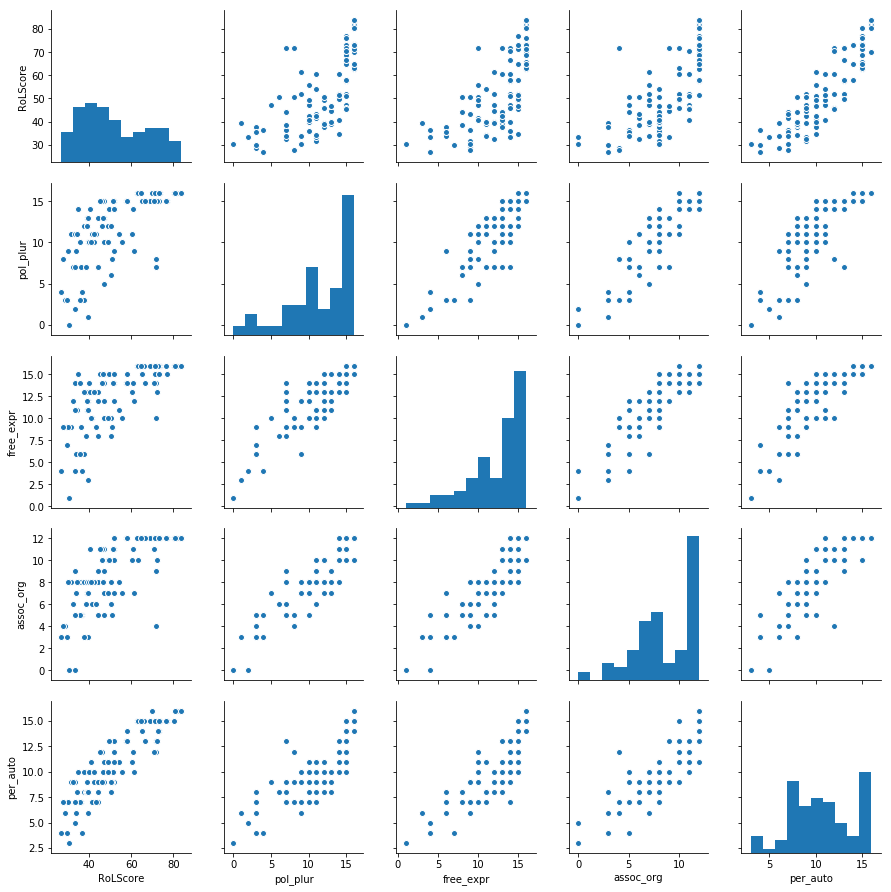

In [9]:
import seaborn as sns
%matplotlib inline
sns.pairplot(df[["RoLScore", "pol_plur", "free_expr", "assoc_org", "per_auto"]])

## Statsmodels and/or Scipy

Statsmodels and Scipy are libraries that provide a bunch of statistical functionality. For example, if you want to do a hypothesis test, you'd go there.  Statsmodels has more robust functionality, more or less, but also pretty terrible documentation, weird rules about what you have to import, etc.  I'll probably grab bits and pieces of each library as we go forward into our stats section. 

Here's an example from statsmodels. Don't worry too much about it for now.

In [10]:
import statsmodels.formula.api as smf
regression = smf.ols('RoLScore ~ assoc_org + per_auto + hprop', data=df).fit()
print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:               RoLScore   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     212.4
Date:                Fri, 25 Jan 2019   Prob (F-statistic):           6.49e-40
Time:                        23:48:52   Log-Likelihood:                -283.38
No. Observations:                  91   AIC:                             574.8
Df Residuals:                      87   BIC:                             584.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1298      2.084      5.821      0.0


<hr>
[Download this lesson in PDF]({attach}../images/key-libraries.pdf)
<hr>